In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split

In [76]:
titanic_df_train = pd.read_csv('Titanic/train.csv')
titanic_df_test = pd.read_csv('Titanic/test.csv')


In [77]:
titanic_df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [78]:
titanic_df_train.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [79]:
titanic_df_train = titanic_df_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [80]:
X_features = list(titanic_df_train.columns)
X_features.remove('Survived')
X_features

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [81]:
encoded_titanic_df = pd.get_dummies(titanic_df_train[X_features], drop_first=True)
X = encoded_titanic_df
Y = titanic_df_train['Survived']

In [82]:
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.3, random_state=42)

In [84]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(train_X, train_y)
predictions = model.predict(test_X)

In [86]:
test_y.values

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1])

In [87]:
predict = pd.DataFrame({'prediction': predictions, 'actual': test_y.values})
predict

,prediction,actual
0,0,1
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
263,0,1
264,0,0
265,0,0
266,0,0


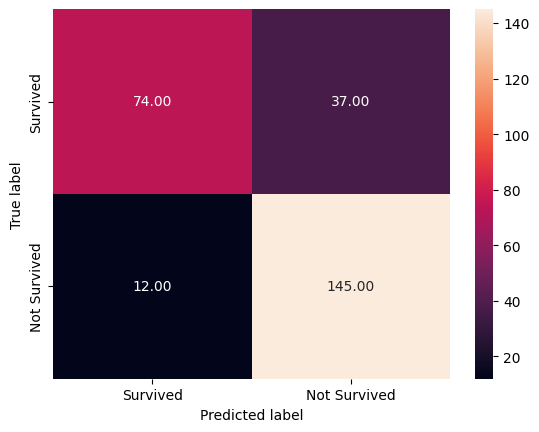

In [88]:
from sklearn import metrics

def draw_cm(actual, predicted):
    cm = metrics.confusion_matrix(actual, predicted, labels=[1,0])
    sn.heatmap(cm, annot=True, fmt='.2f', xticklabels = ["Survived", "Not Survived"], yticklabels = ["Survived", "Not Survived"])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

cm = draw_cm(test_y, predictions)

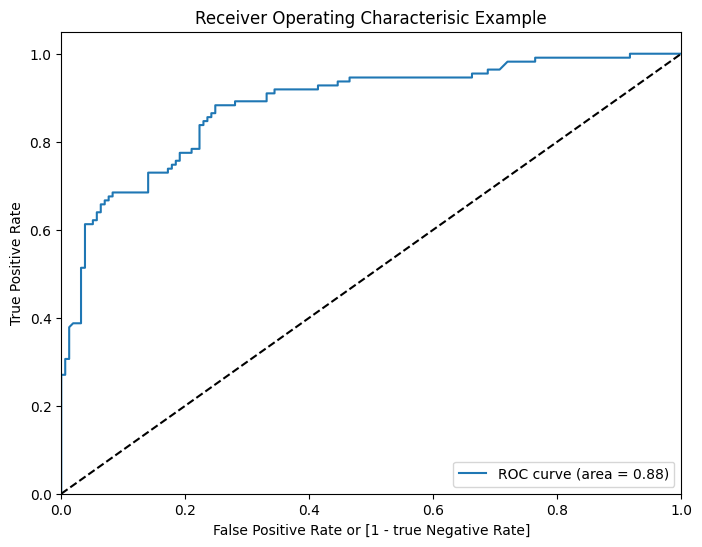

In [89]:
def draw_roc_curve(model, test_X, test_y):
    test_results_df = pd.DataFrame({'actual': test_y})
    test_results_df = test_results_df.reset_index()

    predict_proba_df = pd.DataFrame(model.predict_proba(test_X))
    test_results_df['chd_1'] = predict_proba_df.iloc[:, 1:2]

    fpr, tpr, thresholds = metrics.roc_curve(test_results_df.actual, test_results_df.chd_1, drop_intermediate=False)

    auc_score = metrics.roc_auc_score(test_results_df.actual, test_results_df.chd_1)

    plt.figure(figsize=(8, 6))

    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)

    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    plt.xlabel('False Positive Rate or [1 - true Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characterisic Example')
    plt.legend(loc='lower right')
    plt.show()

    return auc_score, fpr, tpr, thresholds


_, _, _, _ = draw_roc_curve(model, test_X, test_y)

<Axes: xlabel='importance', ylabel='feature'>

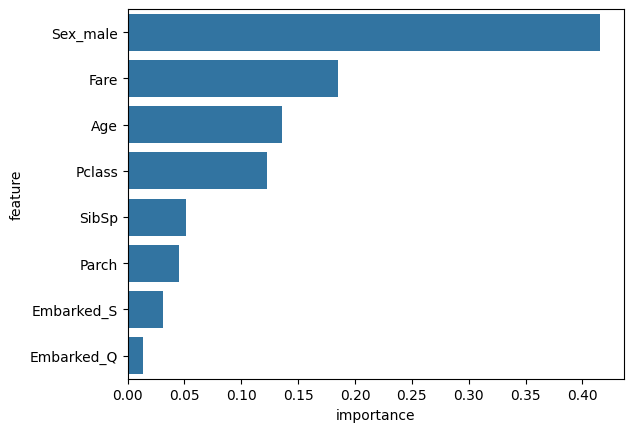

In [90]:
import numpy as np

feature_rank = pd.DataFrame({'feature': train_X.columns, 'importance': model.feature_importances_})

feature_rank = feature_rank.sort_values('importance', ascending=False)

sn.barplot(y='feature', x='importance', data=feature_rank)

In [91]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,3,35.0,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,True,False,True
887,1,19.0,0,0,30.0000,False,False,True
888,3,NaN,1,2,23.4500,False,False,True
889,1,26.0,0,0,30.0000,True,False,False


In [92]:
encoded_titanic_df_test = pd.get_dummies(titanic_df_test[X_features], drop_first=True)
X_test = encoded_titanic_df_test
X_test

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,True,True,False
1,3,47.0,1,0,7.0000,False,False,True
2,2,62.0,0,0,9.6875,True,True,False
3,3,27.0,0,0,8.6625,True,False,True
4,3,22.0,1,1,12.2875,False,False,True
...,...,...,...,...,...,...,...,...
413,3,NaN,0,0,8.0500,True,False,True
414,1,39.0,0,0,108.9000,False,False,False
415,3,38.5,0,0,7.2500,True,False,True
416,3,NaN,0,0,8.0500,True,False,True


In [93]:
pred = model.predict(X_test)

In [94]:
pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [95]:
Sol = pd.DataFrame({'PassengerId': titanic_df_test.PassengerId, 'Survived': pred})
Sol.to_csv('answers.csv', index=False)